# Kmeans clustering :

## Some imports

In [217]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

## Loading Data Set 

In [218]:
crimeDataset = pd.read_csv("/content/crime.csv")
crimeDataset_orig = crimeDataset.copy()
print(crimeDataset.head())

      DOB     DOC  AGE  gender  Place  nationality  TOC  EDU  \
0  Jul-93  16-Oct   23       1      0            1    0    2   
1  Oct-88  18-Jun   30       1      0            2    0    1   
2  Oct-85  15-Nov   30       1      0            3    0    0   
3  Jul-91  15-Sep   24       1      0            4    0    0   
4  Aug-92  15-Aug   23       1      0            5    0    0   

   Residence Status  status  marital status  
0                 0       1               0  
1                 0       0               0  
2                 0       1               2  
3                 0       0               0  
4                 1       0               1  


In [219]:
# Let's drop some unecessary columns
crimeDataset.drop(crimeDataset.columns[[0, 1]], 1, inplace=True)
print(crimeDataset.head())

   AGE  gender  Place  nationality  TOC  EDU  Residence Status  status  \
0   23       1      0            1    0    2                 0       1   
1   30       1      0            2    0    1                 0       0   
2   30       1      0            3    0    0                 0       1   
3   24       1      0            4    0    0                 0       0   
4   23       1      0            5    0    0                 1       0   

   marital status  
0               0  
1               0  
2               2  
3               0  
4               1  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [220]:
# for later used for 2 variables plot for K-Means
df = crimeDataset[['TOC', 'nationality']]
df.head()

,TOC,nationality
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5


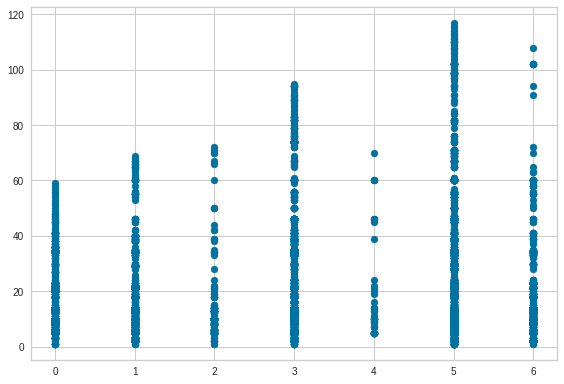

In [221]:
plt.scatter(df['TOC'], df['nationality'])

In [230]:
from sklearn.cluster import DBSCAN
DBSCAN = DBSCAN(eps=2, min_samples=10).fit(df) 
DBSCAN.labels_
np.unique(DBSCAN.labels_)

array([-1,  0,  1,  2,  3])

In [231]:
no_clusters = len(np.unique(DBSCAN.labels_) )
no_noise = np.sum(np.array(DBSCAN.labels_) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

Estimated no. of clusters: 5
Estimated no. of noise points: 5


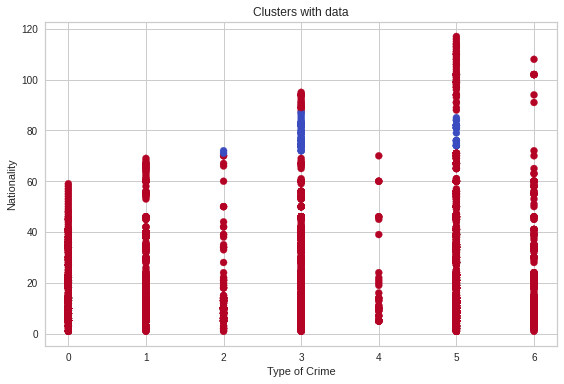

In [233]:
# Generate scatter plot for training data
colors = list(map(lambda x: '#3b4cc0' if x == 1 else '#b40426', DBSCAN.labels_))
plt.scatter(df['TOC'], df['nationality'], c=colors, marker="o", picker=True)
plt.title('Clusters with data')
plt.xlabel('Type of Crime')
plt.ylabel('Nationality')
plt.show()

In [234]:
print(DBSCAN.labels_)


[0 0 0 ... 0 0 0]


IndexError: ignored

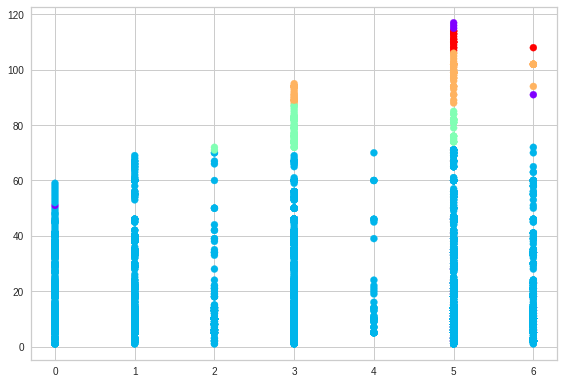

In [235]:
plt.scatter(df['TOC'],df['nationality'], c=DBSCAN.labels_, cmap='rainbow')
plt.scatter(DBSCAN.labels_[:,0] ,DBSCAN.labels_[:,1], color='black')

In [236]:
df['cluster'] = DBSCAN.labels_
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,TOC,nationality,cluster
0,0,1,0
1,0,2,0
2,0,3,0
3,0,4,0
4,0,5,0


No handles with labels found to put in legend.


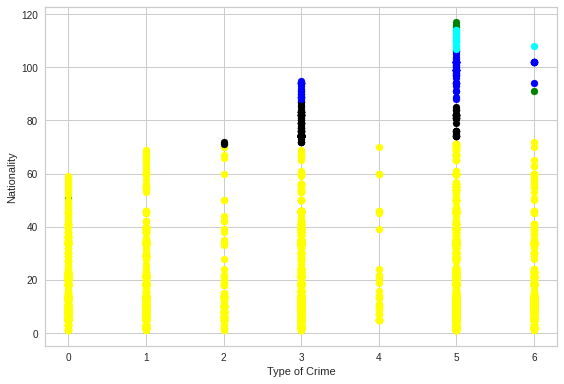

In [244]:
df1 =df[df.cluster == -1]
df2 =df[df.cluster == 0]
df3 =df[df.cluster == 1]
df4 =df[df.cluster == 2]
df5 =df[df.cluster == 3]
plt.scatter(df1['TOC'],df1['nationality'], color = 'green')
plt.scatter(df2['TOC'],df2['nationality'], color = 'yellow')
plt.scatter(df3['TOC'],df3['nationality'], color = 'black')
plt.scatter(df4['TOC'],df4['nationality'], color = 'blue')
plt.scatter(df5['TOC'],df5['nationality'], color = 'Cyan')
plt.xlabel('Type of Crime')
plt.ylabel('Nationality')
plt.legend()

In [ ]:
"""# issue is due to scaling issue thats why we have to scale our algorithm
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(df[['nationality']])
df['nationality'] = scaler.transform(df[['nationality']])

scaler.fit(df[['TOC']])
df['TOC'] = scaler.transform(df[['TOC']])"""

In [245]:
df.head()

,TOC,nationality,cluster
0,0,1,0
1,0,2,0
2,0,3,0
3,0,4,0
4,0,5,0


In [246]:
df.tail()

,TOC,nationality,cluster
20162,6,5,0
20163,6,14,0
20164,6,5,0
20165,6,5,0
20166,6,5,0


In [247]:
#to save file into csv
df.to_csv("Cluster.csv")

In [248]:
DBSCAN.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [249]:
df1

,TOC,nationality,cluster
1419,0,51,-1
17638,5,115,-1
17886,5,116,-1
17939,5,117,-1
18898,6,91,-1


IndexError: ignored

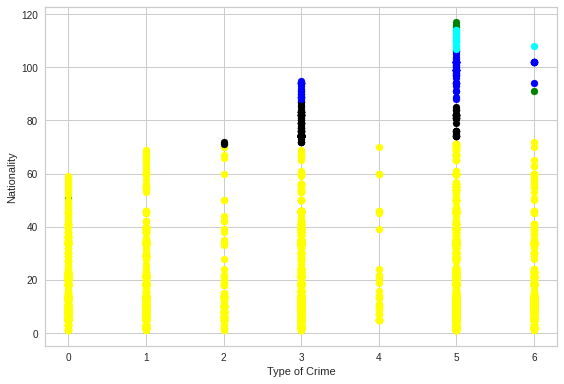

In [250]:
df1 =df[df.cluster == -1]
df2 =df[df.cluster == 0]
df3 =df[df.cluster == 1]
df4 =df[df.cluster == 2]
df5 =df[df.cluster == 3]
plt.scatter(df1['TOC'],df1['nationality'], color = 'green')
plt.scatter(df2['TOC'],df2['nationality'], color = 'yellow')
plt.scatter(df3['TOC'],df3['nationality'], color = 'black')
plt.scatter(df4['TOC'],df4['nationality'], color = 'blue')
plt.scatter(df5['TOC'],df5['nationality'], color = 'Cyan')
plt.xlabel('Type of Crime')
plt.ylabel('Nationality')
plt.scatter(DBSCAN.labels_[:,0],DBSCAN.labels_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [251]:
from IPython.display import display, HTML
from pdb import set_trace
from sklearn.tree import _tree, DecisionTreeClassifier

In [252]:
def pretty_print(df):
    return display( HTML( df.to_html().replace("\\n","<br>") ) )

def get_class_rules(tree: DecisionTreeClassifier, feature_names: list):
  inner_tree: _tree.Tree = tree.tree_
  classes = tree.classes_
  class_rules_dict = dict()

  def tree_dfs(node_id=0, current_rule=[]):
    # feature[i] holds the feature to split on, for the internal node i.
    split_feature = inner_tree.feature[node_id]
    if split_feature != _tree.TREE_UNDEFINED: # internal node
      name = feature_names[split_feature]
      threshold = inner_tree.threshold[node_id]
      # left child
      left_rule = current_rule + ["({} <= {})".format(name, threshold)]
      tree_dfs(inner_tree.children_left[node_id], left_rule)
      # right child
      right_rule = current_rule + ["({} > {})".format(name, threshold)]
      tree_dfs(inner_tree.children_right[node_id], right_rule)
    else: # leaf
      dist = inner_tree.value[node_id][0]
      dist = dist/dist.sum()
      max_idx = dist.argmax()
      if len(current_rule) == 0:
        rule_string = "ALL"
      else:
        rule_string = " and ".join(current_rule)
      # register new rule to dictionary
      selected_class = classes[max_idx]
      class_probability = dist[max_idx]
      class_rules = class_rules_dict.get(selected_class, [])
      class_rules.append((rule_string, class_probability))
      class_rules_dict[selected_class] = class_rules
    
  tree_dfs() # start from root, node_id = 0
  return class_rules_dict

def cluster_report(data: pd.DataFrame, clusters, min_samples_leaf=50, pruning_level=0.01):
    # Create Model
    tree = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, ccp_alpha=pruning_level)
    tree.fit(data, clusters)
    
    # Generate Report
    feature_names = data.columns
    class_rule_dict = get_class_rules(tree, feature_names)

    report_class_list = []
    for class_name in class_rule_dict.keys():
        rule_list = class_rule_dict[class_name]
        combined_string = ""
        for rule in rule_list:
            combined_string += "[{}] {}\n\n".format(rule[1], rule[0])
        report_class_list.append((class_name, combined_string))
        
    cluster_instance_df = pd.Series(clusters).value_counts().reset_index()
    cluster_instance_df.columns = ['class_name', 'instance_count']
    report_df = pd.DataFrame(report_class_list, columns=['class_name', 'rule_list'])
    report_df = pd.merge(cluster_instance_df, report_df, on='class_name', how='left')
    pretty_print(report_df.sort_values(by='class_name')[['class_name', 'instance_count', 'rule_list']])

In [264]:
cluster_report(df, DBSCAN.labels_, min_samples_leaf=50, pruning_level=0.05)

,class_name,instance_count,rule_list
4,-1,5,NaN
0,0,19925,[0.988000198343829] ALL
1,1,141,NaN
2,2,79,NaN
3,3,17,NaN


In [254]:
# To calculate the score 
from sklearn.metrics import davies_bouldin_score
db_index = davies_bouldin_score(df, DBSCAN.labels_)
print(db_index)

4.062329107749755


In [255]:
# to calculate sihouette
from sklearn.metrics import silhouette_score
score = silhouette_score(df, DBSCAN.labels_, metric='euclidean')
print(score)

0.7885027489913267
